In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
#read and extract city data

csvpath_city = os.path.join('raw_data', 'city_data.csv')
city_pd = pd.read_csv(csvpath_city)
city_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
#read and extract ride data

csvpath_ride = os.path.join('raw_data', 'ride_data.csv')
ride_pd = pd.read_csv(csvpath_ride)
ride_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
# Merge dataframes on city name

merge_data = pd.merge(ride_pd, city_pd, on="city",
                       how="left")
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [5]:
# Select rows with type == 'Urban'
# urban_df = merge_data[merge_data['type'] == 'Urban']
# urban_df


# ... do total # drivers, average fare, etc. calculations
# plot 

# plt.scatter()

# Select rows with type == 'Suburban'
# ... do total # drivers, average fare, etc. calculations
# plot 



# Select rows with type == 'Rural'
# ... do total # drivers, average fare, etc. calculations
# plot 

# Show plot
#plt.show()


# # Total Number of Rides Per City
# city_groups = ride_data.groupby('city')
# rides_per_city = city_groups['date'].count()
# #rides_per_city = ride_data["city"].value_counts()
# rides_per_city.head()

In [6]:
# Split up the merge data into groups based upon 'city' and 'type'
city_groups = merge_data.groupby(['type','city'])

# Create a new variable that holds the mean of the group
city_mean = city_groups.mean()
city_mean.head()

fare       ride_id  driver_count
type  city                                                 
Rural East Leslie     33.660909  6.051052e+12           9.0
      East Stephen    39.053000  5.306327e+12           6.0
      East Troybury   33.244286  5.948234e+12           3.0
      Erikport        30.043750  6.883015e+12           3.0
      Hernandezshire  32.002222  5.206210e+12          10.0

In [7]:
# Create a new variable that holds the count of the group
city_count = city_groups.count()
city_count.head()

date  fare  ride_id  driver_count
type  city                                             
Rural East Leslie       11    11       11            11
      East Stephen      10    10       10            10
      East Troybury      7     7        7             7
      Erikport           8     8        8             8
      Hernandezshire     9     9        9             9

In [8]:
# Create a new variable that holds the sum of the group
city_sum = city_groups.sum()
city_sum.head()

fare         ride_id  driver_count
type  city                                                
Rural East Leslie     370.27  66561575296093            99
      East Stephen    390.53  53063273613807            60
      East Troybury   232.71  41637638844907            21
      Erikport        240.35  55064119128623            24
      Hernandezshire  288.02  46855891812045            90

In [9]:
type_1 = "Rural"
rural_fare = city_mean.loc[type_1,'fare']
rural_rides = city_count.loc[type_1,'ride_id']
rural_fare_total = city_sum.loc[type_1,'fare'].sum()
rural_drivers = city_mean.loc[type_1,'driver_count'].sum()
rural_rides_total = city_count.loc[type_1,'ride_id'].sum()
type_2 = "Suburban"
suburban_fare = city_mean.loc[type_2,'fare']
suburban_rides = city_count.loc[type_2,'ride_id']
suburban_fare_total = city_sum.loc[type_2,'fare'].sum()
suburban_drivers = city_mean.loc[type_2,'driver_count'].sum()
suburban_rides_total = city_count.loc[type_2,'ride_id'].sum()
type_3 = "Urban"
urban_fare = city_mean.loc[type_3,'fare']
urban_rides = city_count.loc[type_3,'ride_id']
urban_fare_total = city_sum.loc[type_3,'fare'].sum()
urban_drivers = city_mean.loc[type_3,'driver_count'].sum()
urban_rides_total = city_count.loc[type_3,'ride_id'].sum()
print(rural_fare_total, suburban_fare_total, urban_fare_total, 
      rural_drivers, suburban_drivers, urban_drivers, 
      rural_rides_total, suburban_rides_total, urban_rides_total )

4255.09 20335.69 40078.34 104.0 629.0 2607.0 125 657 1625


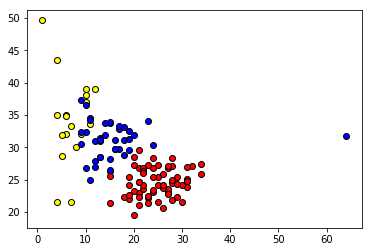

In [10]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(rural_rides, rural_fare, marker="o", facecolors="yellow", edgecolors="black")
plt.scatter(suburban_rides, suburban_fare, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(urban_rides, urban_fare, marker="o", facecolors="red", edgecolors="black")
plt.show()

In [19]:
pies = ["rural", "suburban", "urban"]
colors = ["yellow","lightblue","red"]
explode = (0.1,0.1,0)
pie_fares = [rural_fare_total, suburban_fare_total, urban_fare_total]
pie_rides = [rural_rides_total, suburban_rides_total, urban_rides_total]
pie_drivers = [rural_drivers, suburban_drivers, urban_drivers]

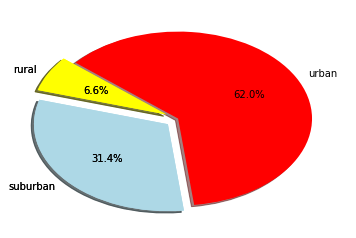

In [20]:
plt.pie(pie_fares, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [13]:
# # Group the urban data by city 
# urban_city_groups = urban_df.groupby('city')

# # # Total Number of Rides Per City - urban 
# rides_urban = urban_city_groups['ride_id'].count()
# ##rides_per_city = ride_data["city"].value_counts()
# rides_urban.head()

In [14]:
# # Average Fare ($) Per City - urban
# fares_urban = urban_city_groups['fare'].mean()
# fares_urban.head()

In [15]:
# # Total Number of Drivers Per City
# city_data_groups = city_data.groupby('city')
# city_drivers = city_data_groups['driver_count'].sum()
# city_drivers.head()